# House Price Prediction using Advanced Regression

**Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

In [1]:
# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

# Modifying pandas display options
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

## Reading and Understanding the Data

In [2]:
# Loading the dataset
house = pd.read_csv('train.csv')
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
# Checking the shape of the given dataset
house.shape

(1460, 81)

The dataset consists of **1460 rows** and **81 columns**.

In [4]:
# Checking the summary of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the summary, we can see some of the columns have null values.

In [5]:
# Checking for duplicate values
house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


As we can see, there are no duplicated rows.

In [6]:
# Finding the stats of the numerical columns
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Defining a function to find count, null, unique, datatype of each column in the dataframe
def df_attr(df):
    count = df.count()
    null = df.isnull().sum()
    null_perc = round(df.isnull().sum()/len(df.index)*100,4)
    unique = df.nunique()
    types = df.dtypes
    return pd.concat([count, null, null_perc, unique, types], axis = 1, 
                     keys=['COUNT','NULL','PERCENT','NUM_UNIQUE','DATATYPE']).sort_values(by='PERCENT',ascending=False)

In [8]:
# Finding the null values, null percentage, unique numbers and datatype of all variables in the dataset
house_attr = df_attr(house)
house_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
PoolQC,7,1453,99.520500,3,object
MiscFeature,54,1406,96.301400,4,object
Alley,91,1369,93.767100,2,object
Fence,281,1179,80.753400,4,object
FireplaceQu,770,690,47.260300,5,object
LotFrontage,1201,259,17.739700,110,float64
GarageYrBlt,1379,81,5.547900,97,float64
GarageCond,1379,81,5.547900,5,object
GarageType,1379,81,5.547900,6,object
GarageFinish,1379,81,5.547900,3,object


Some of the variables having high number of null values actually have 'NA' as one of their values which actually mean 'None' according to the data. So, we'll deal with these in the data cleaning part.

## Data Cleaning

In [9]:
# Dropping the'Id' column as we won't use it for our analysis
house.drop('Id', axis=1, inplace=True)

### Dealing with missing values in categorical columns

In [10]:
# Finding categorical columns with null values
null_obj_cols = list(house_attr.loc[(house_attr.NULL>0) & (house_attr.DATATYPE=='object')].index)
null_obj_cols.remove('Electrical')
print(f'Categorical columns with null values: {null_obj_cols}', end='\n\n')

# Filling the null values in the categorical columns with 'None'
for col in null_obj_cols:
    house[col].fillna('None', inplace=True)

house.info()

Categorical columns with null values: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null  

In [11]:
# Finding the value counts of 'Electrical' column
house['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

Filling the missing values in `Electrical` column with its mode.

In [12]:
# Filling the null values in 'Electrical' column with 'SBrkr'
house['Electrical'].fillna('SBrkr', inplace=True)

house['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Dealing with highly skewed categorical data

In [13]:
# Checking for skewed categorical columns
obj_cols = house.select_dtypes(exclude=['int64', 'float64'])

for col in obj_cols:
    if(house[col].value_counts(normalize=True).max() >= 0.75):
        print(f'- {col} : {round(house[col].value_counts(normalize=True).max()*100,2)}%')

- MSZoning : 78.84%
- Street : 99.59%
- Alley : 93.77%
- LandContour : 89.79%
- Utilities : 99.93%
- LandSlope : 94.66%
- Condition1 : 86.3%
- Condition2 : 98.97%
- BldgType : 83.56%
- RoofStyle : 78.15%
- RoofMatl : 98.22%
- ExterCond : 87.81%
- BsmtCond : 89.79%
- BsmtFinType2 : 86.03%
- Heating : 97.81%
- CentralAir : 93.49%
- Electrical : 91.44%
- Functional : 93.15%
- GarageQual : 89.79%
- GarageCond : 90.82%
- PavedDrive : 91.78%
- PoolQC : 99.52%
- Fence : 80.75%
- MiscFeature : 96.3%
- SaleType : 86.78%
- SaleCondition : 82.05%


We'll remove all the categorical columns with more than 85% of their values in one category

In [14]:
# Finding the categorical columns with highly skewed distribution i.e., >85% in one category
skew_obj_cols = []
print('Categorical columns with more than 85% of their values in a single category:')

for col in obj_cols:
    if(house[col].value_counts(normalize=True).max() >= 0.85):
        skew_obj_cols.append(col)
        print(f'- {col}')

Categorical columns with more than 85% of their values in a single category:
- Street
- Alley
- LandContour
- Utilities
- LandSlope
- Condition1
- Condition2
- RoofMatl
- ExterCond
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- MiscFeature
- SaleType


Categorical columns with more than 85% of their values in a single category


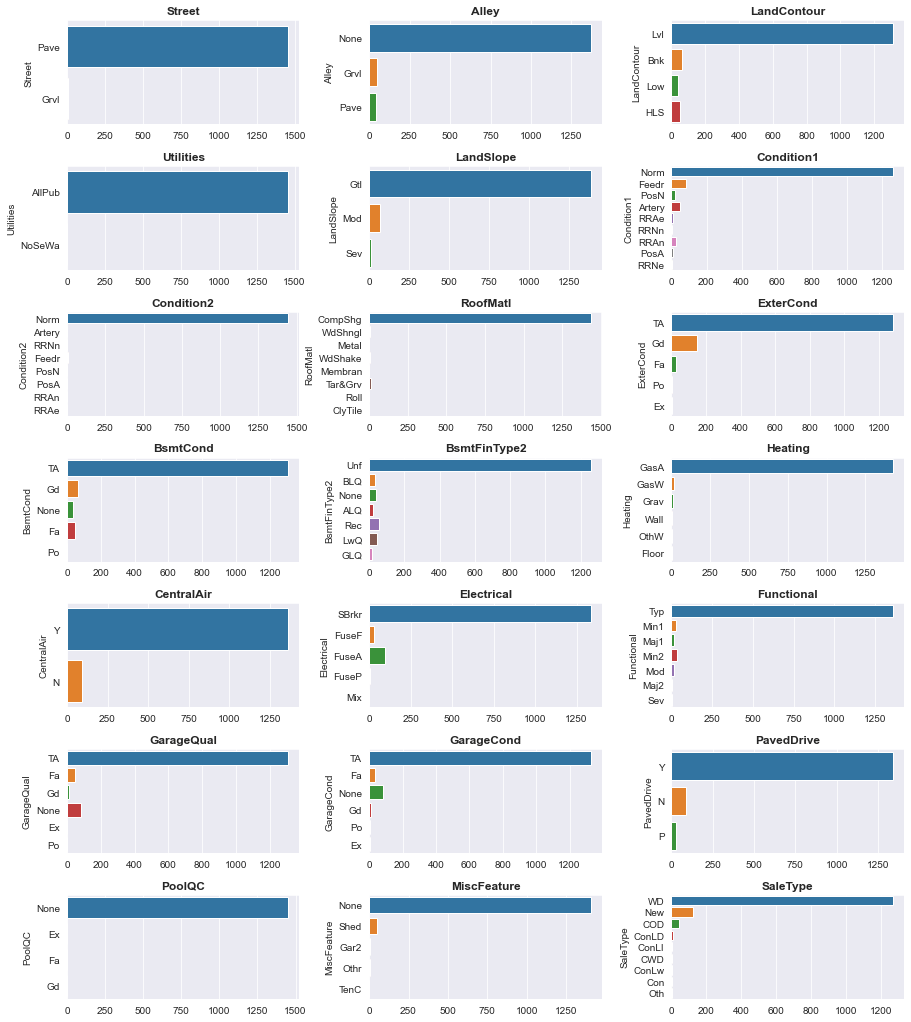

In [15]:
plt.figure(figsize = (15,18))
print('Categorical columns with more than 85% of their values in a single category')
for i,col in enumerate(skew_obj_cols):
    plt.subplot(7, 3, i+1)
    sns.countplot(y=col, data=house)
    plt.title(col, weight='bold')
    plt.xlabel(None)
plt.subplots_adjust(wspace=0.3, hspace = 0.4)

In [16]:
# Dropping the highly skewed categorical columns
house.drop(skew_obj_cols, axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1452 non-null   float64
 18  ExterQua

### Dealing with missing values in numerical columns

Numerical columns with missing values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


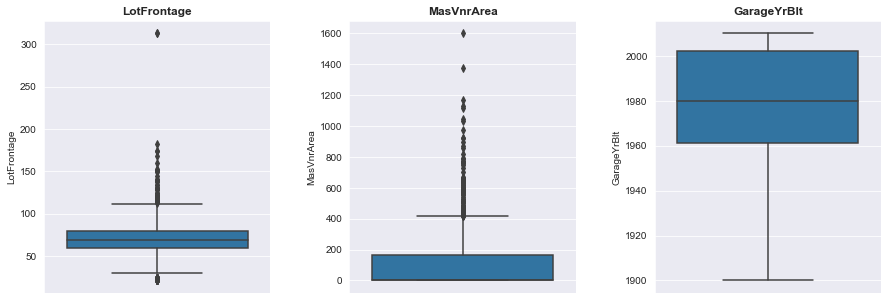

In [17]:
# Finding numerical columns with null values
null_num_cols = list(house.isnull().sum()[house.isnull().sum()>0].index)
print(f'Numerical columns with missing values: {null_num_cols}')

plt.figure(figsize = (15,5))
for i,col in enumerate(null_num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=col, data=house)
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

In [18]:
house[null_num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


In [19]:
# Filling the null values in the columns with median values
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)

# Filling the null values in 'GarageYrBlt' with 0 as no garage has been built
house['GarageYrBlt'].fillna(0, inplace=True)

In [20]:
house_attr = df_attr(house)
house_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
MSSubClass,1460,0,0.000000,15,int64
GarageFinish,1460,0,0.000000,4,object
BsmtFullBath,1460,0,0.000000,4,int64
BsmtHalfBath,1460,0,0.000000,3,int64
FullBath,1460,0,0.000000,4,int64
HalfBath,1460,0,0.000000,3,int64
BedroomAbvGr,1460,0,0.000000,8,int64
KitchenAbvGr,1460,0,0.000000,4,int64
KitchenQual,1460,0,0.000000,4,object
TotRmsAbvGrd,1460,0,0.000000,12,int64


**_Now, there are no null values in the dataset._**

### Dealing with highly skewed numerical data

In [21]:
# Checking for skewed numerical data
num_cols = house.select_dtypes(include=['int64', 'float'])

for col in num_cols:
    if(house[col].value_counts(normalize=True).max() >= 0.75):
        print(f'- {col} : {round(house[col].value_counts(normalize=True).max()*100, 2)}%')

- BsmtFinSF2 : 88.56%
- LowQualFinSF : 98.22%
- BsmtHalfBath : 94.38%
- KitchenAbvGr : 95.34%
- EnclosedPorch : 85.75%
- 3SsnPorch : 98.36%
- ScreenPorch : 92.05%
- PoolArea : 99.52%
- MiscVal : 96.44%


In [22]:
# Finding the numerical columns with highly skewed distribution i.e., >85% having one value
skew_num_cols = []
print('Numerical columns with more than 85% of their values having same value:')
for col in num_cols:
    if(house[col].value_counts(normalize=True).max() >= 0.85):
        skew_num_cols.append(col)
        print(f'- {col}')

Numerical columns with more than 85% of their values having same value:
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGr
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal


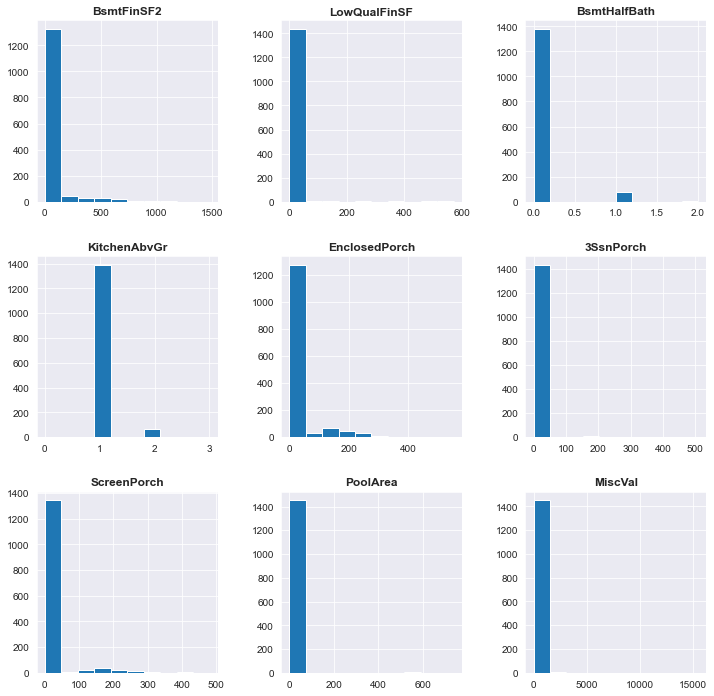

In [23]:
plt.figure(figsize = (12,12))
for i,col in enumerate(skew_num_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(house[col])
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

In [24]:
house.drop(skew_num_cols, axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

count    1460.000000
mean        0.476712
std         0.499629
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Remodelled, dtype: float64


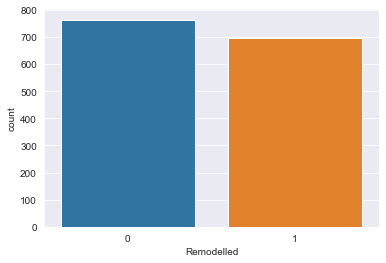

In [25]:
# Adding a new column to check whether a house has been remodelled or not
house['Remodelled'] = house.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] 
                                  else (1 if x['YearBuilt'] < x['YearRemodAdd'] else 2), axis=1)
print(house['Remodelled'].describe())
sns.countplot(house['Remodelled']);

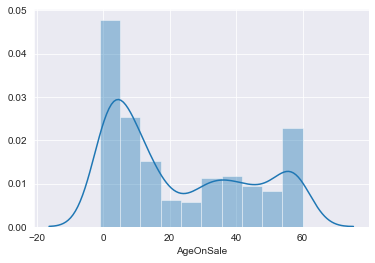

In [26]:
# Adding a new column to check the built/ rebuilt age of the house during the sale
house['AgeOnSale'] = house.apply(lambda x: x['YrSold'] - x['YearBuilt'] if x['YearBuilt'] == x['YearRemodAdd']
                                 else x['YrSold'] - x['YearRemodAdd'], axis=1)
house['AgeOnSale'].describe()
sns.distplot(house['AgeOnSale']);

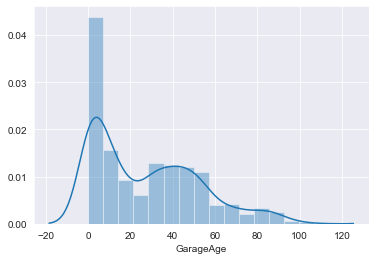

In [27]:
# Adding a new column to check the age of the garage during the sale
house['GarageAge'] = house.apply(lambda x: x['YrSold'] - x['GarageYrBlt'] if x['GarageYrBlt'] != 0
                                 else 0, axis=1)
house['GarageAge'].describe()
sns.distplot(house['GarageAge']);

As we have derived the `Remodelled`, `AgeOnSale`, `GarageAge` from the variables `YearBuilt`, `YearRemodAdd`, `YrSold` and `GarageYrBlt`, we can drop these columns.

In [28]:
# Dropping the columns from which we have derived the information
house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt'], axis=1, inplace=True)

### Outlier Treatment

In [29]:
# Identifying actual numerical variables
house_attr = df_attr(house)
num_vars = list(house_attr.loc[(house_attr.DATATYPE != 'object') & (house_attr.NUM_UNIQUE >= 15)].index)
num_vars.remove('SalePrice')

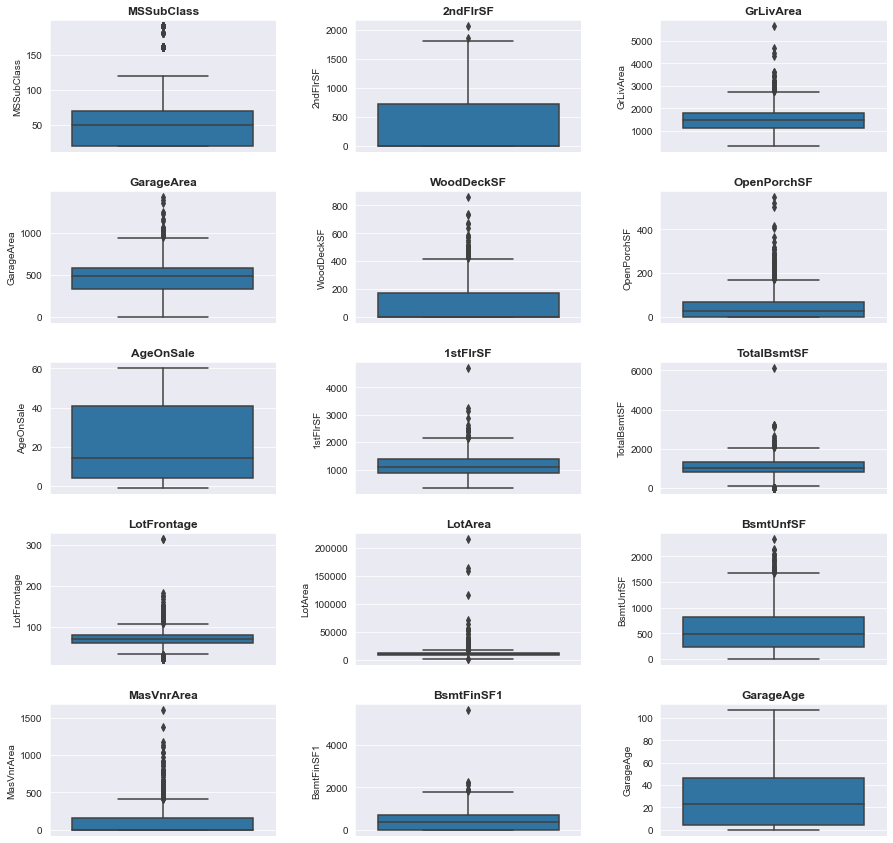

In [30]:
plt.figure(figsize = (15,15))
for i, col in enumerate(num_vars):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=col, data=house)
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

In [31]:
house[num_vars].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,954.2,1141.05,1418.92,2065.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,2158.3,2466.10,3123.48,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,757.1,850.10,1002.79,1418.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.00,0.0,168.00,262.0,335.00,505.46,857.0
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,25.0,68.00,130.0,175.05,285.82,547.0
AgeOnSale,1460.0,22.950000,20.640653,-1.0,4.00,14.0,41.00,56.0,58.00,60.00,60.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,1680.0,1831.25,2219.46,4692.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,1602.2,1753.00,2155.05,6110.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,92.0,104.00,137.41,313.0


In [32]:
outlier_cols = ['GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '1stFlrSF', 'TotalBsmtSF', 'LotFrontage', 
                'LotArea', 'MasVnrArea', 'BsmtFinSF1']

# Removing the outliers above 99th percentile
for col in outlier_cols:
    house = house[house[col] < house[col].quantile(0.99)]

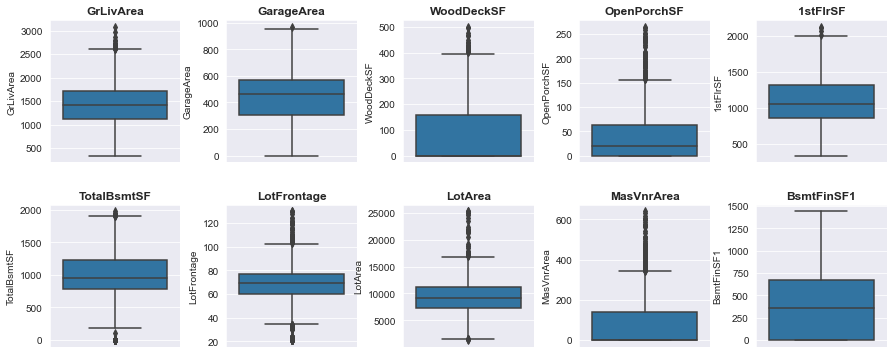

In [33]:
plt.figure(figsize = (15,6))
for i, col in enumerate(outlier_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=col, data=house)
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

We've removed most of the outliers which were present earlier.

In [34]:
print(f'Percentage of rows retained: {round(house.shape[0]/1460, 2)*100}%')

Percentage of rows retained: 90.0%


## Data Visualisation

We'll first visualise the target variable `SalePrice`

Skew: 1.03
Kurtosis: 1.4


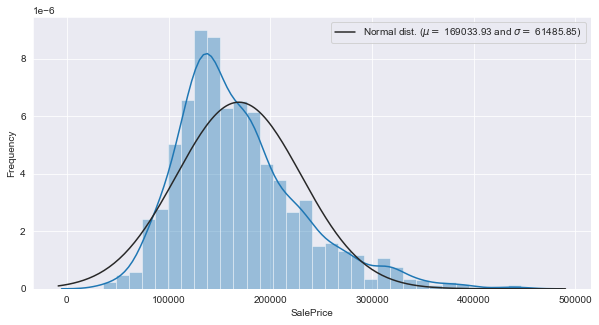

In [35]:
print(f'Skew: {round(house.SalePrice.skew(), 2)}')
print(f'Kurtosis: {round(house.SalePrice.kurtosis(), 2)}')

# Visualising the target variable 'SalePrice'
plt.figure(figsize=(10,5))
sns.distplot(house['SalePrice'], fit=stats.norm)
mu, sigma = stats.norm.fit(house['SalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

Looks like our target variable is Right skewed. So, we'll apply log transformation to reduce the skewness.

Skew: -0.15
Kurtosis: 0.57


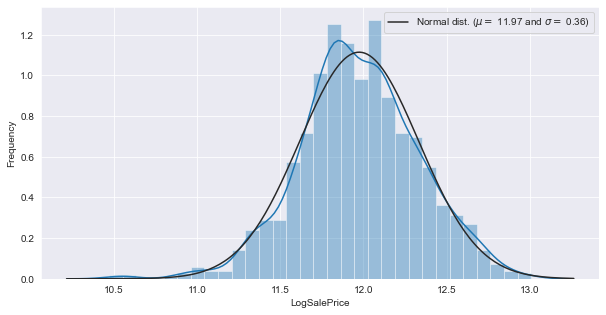

In [36]:
# Performing log transformation to reduce the skewness of the variable
house['LogSalePrice'] = np.log(house['SalePrice'])
print(f'Skew: {round(house.LogSalePrice.skew(), 2)}')
print(f'Kurtosis: {round(house.LogSalePrice.kurtosis(), 2)}')

plt.figure(figsize=(10,5))
sns.distplot(house['LogSalePrice'], fit=stats.norm);
mu, sigma = stats.norm.fit(house['LogSalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

Now, after the log transformation our target variable `SalePrice` is more or less normal.

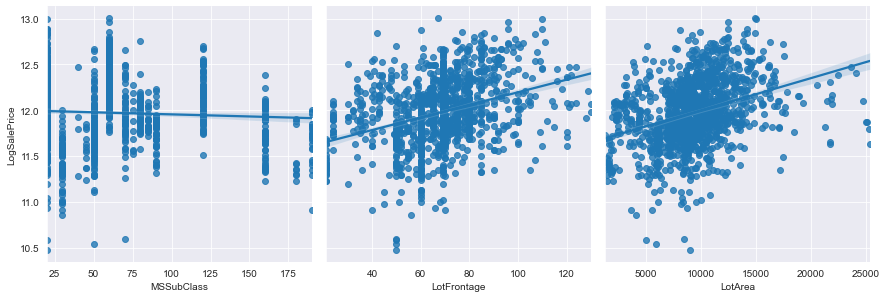

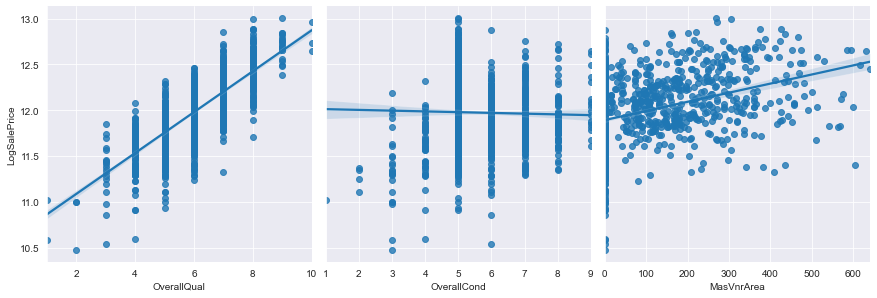

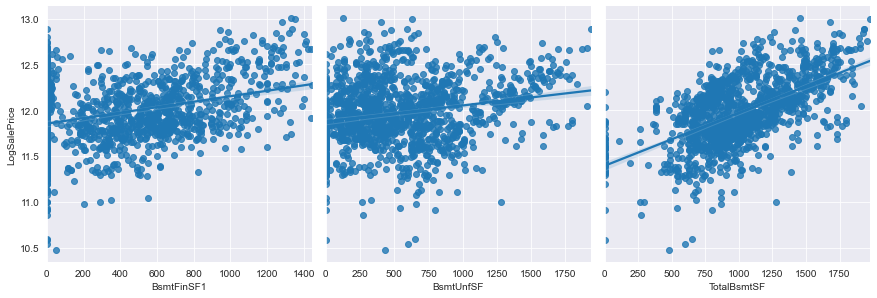

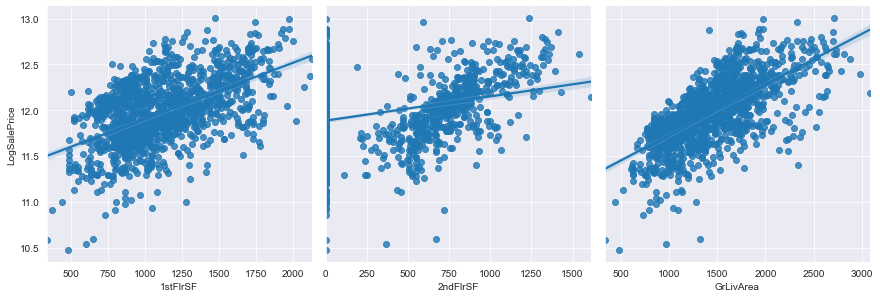

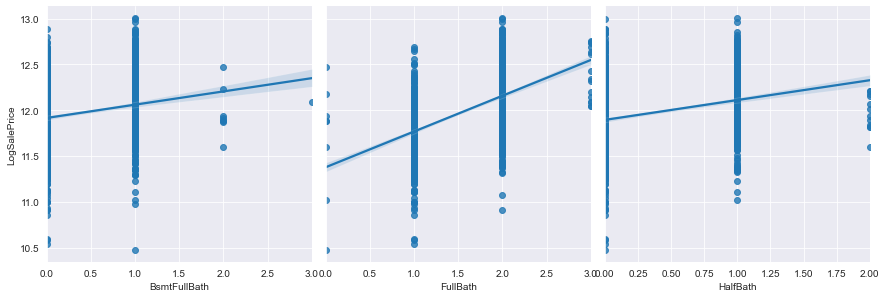

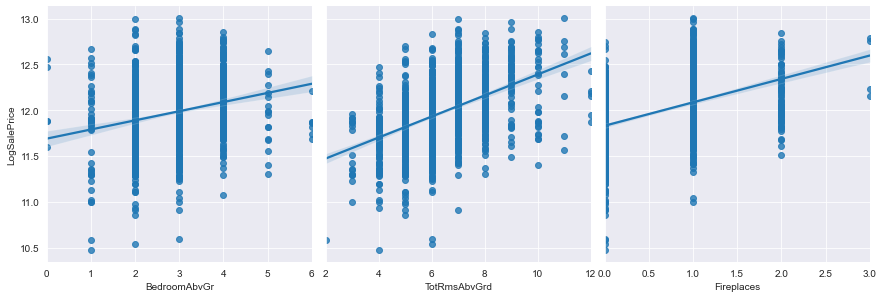

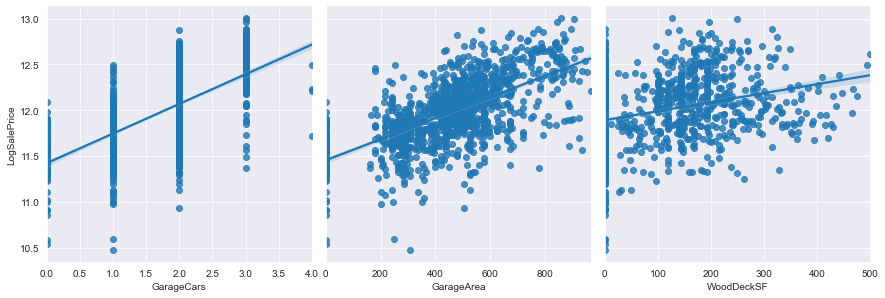

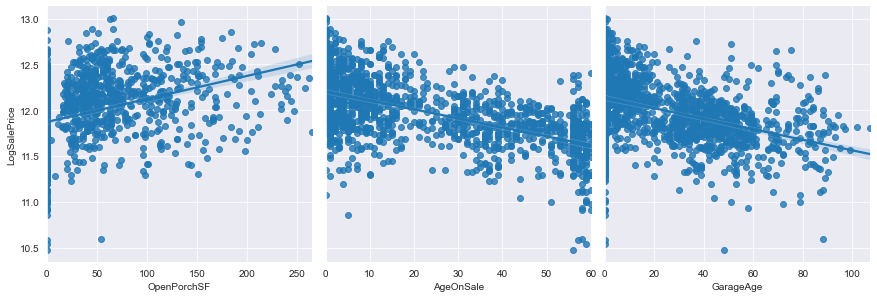

In [37]:
# Plotting to analyse the relation between numerical variables and target variable
num_cols = list(house.select_dtypes(exclude='object').columns)
num_cols.remove('SalePrice')
num_cols.remove('LogSalePrice')
num_cols.remove('Remodelled')
num_cols_chunk = [num_cols[i:i+3] for i in range(0, len(num_cols), 3)]

for cols in num_cols_chunk:
    sns.pairplot(house, x_vars=cols, y_vars='LogSalePrice', height=4, aspect=1, kind='reg');

From the above graphs,
- Most of the variables like `OverallQual`, `GrLivArea`, `1stFlrSF` are directly proportional to `SalePrice`.
- Some variables like `AgeOnSale`, `GarageAge` are inversely proportional to `SalePrice`.
- `OverallCond` doesnot change much with the `SalePrice`.

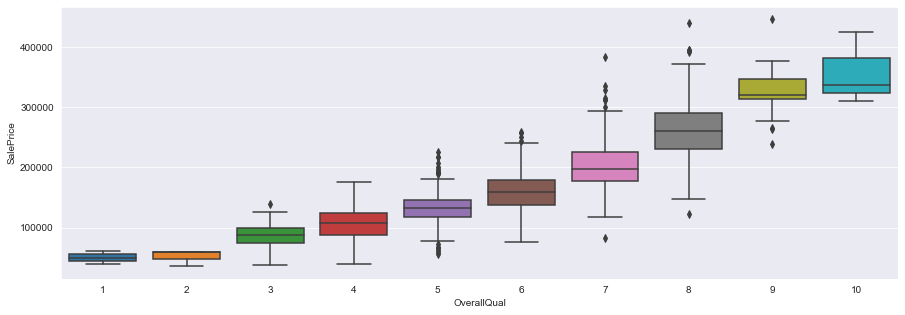

In [38]:
# Plotting 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(15,5))
sns.boxplot(y='SalePrice', x='OverallQual', data=house);

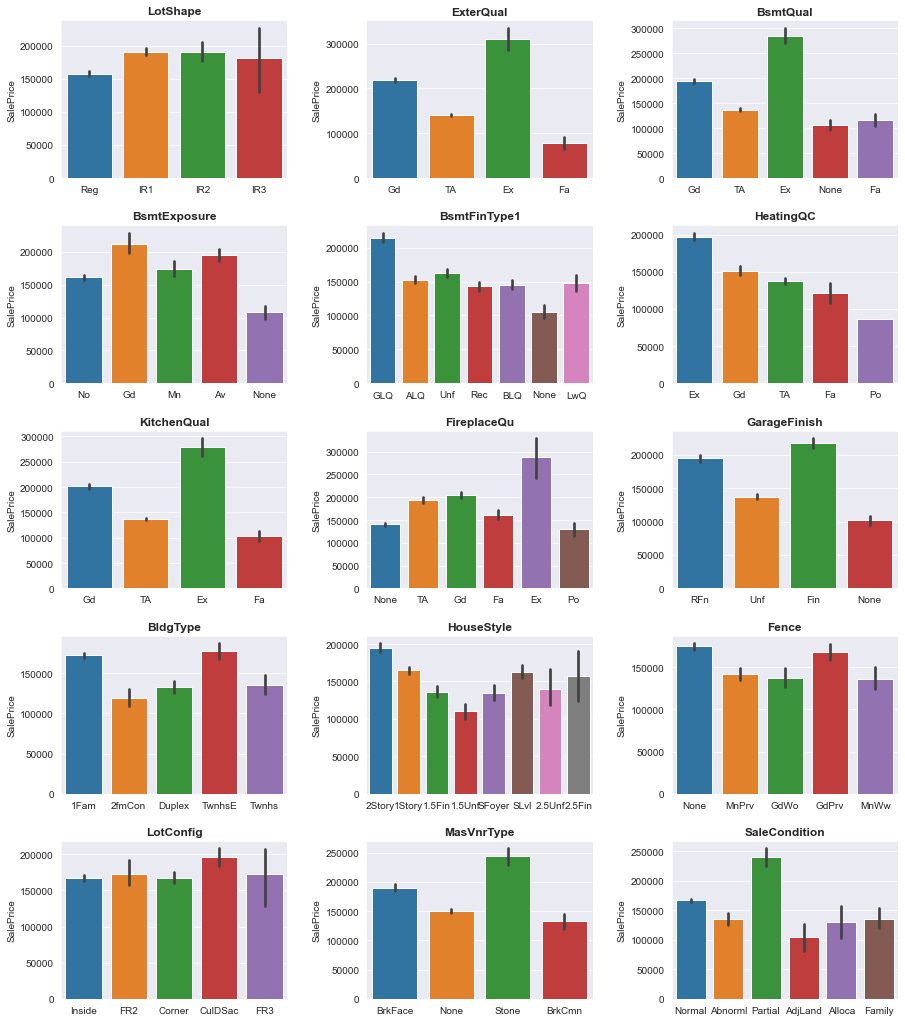

In [39]:
# Comparing the 'SalePrice' of various ordinal categorical columns
ord_cols = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
            'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig', 'MasVnrType', 'SaleCondition']

plt.figure(figsize=(15,18))
for i, col in enumerate(ord_cols):
    plt.subplot(5, 3, i+1)
    sns.barplot(x=col, y='SalePrice', data=house)
    plt.title(col, weight='bold')
    plt.xlabel(None)
plt.subplots_adjust(wspace=0.35, hspace = 0.3) 

- Excellent quality of external material, basement, kitchen and heating are more likely to fetch higher `SalePrice`.
- Partial `SaleCondition` has higher average `SalePrice` than other types.
- Garages with finished or rough finished interiors are more likely to fetch higher `SalePrice`.
- Masony veneer finished with stone has higher average `SalePrice`.

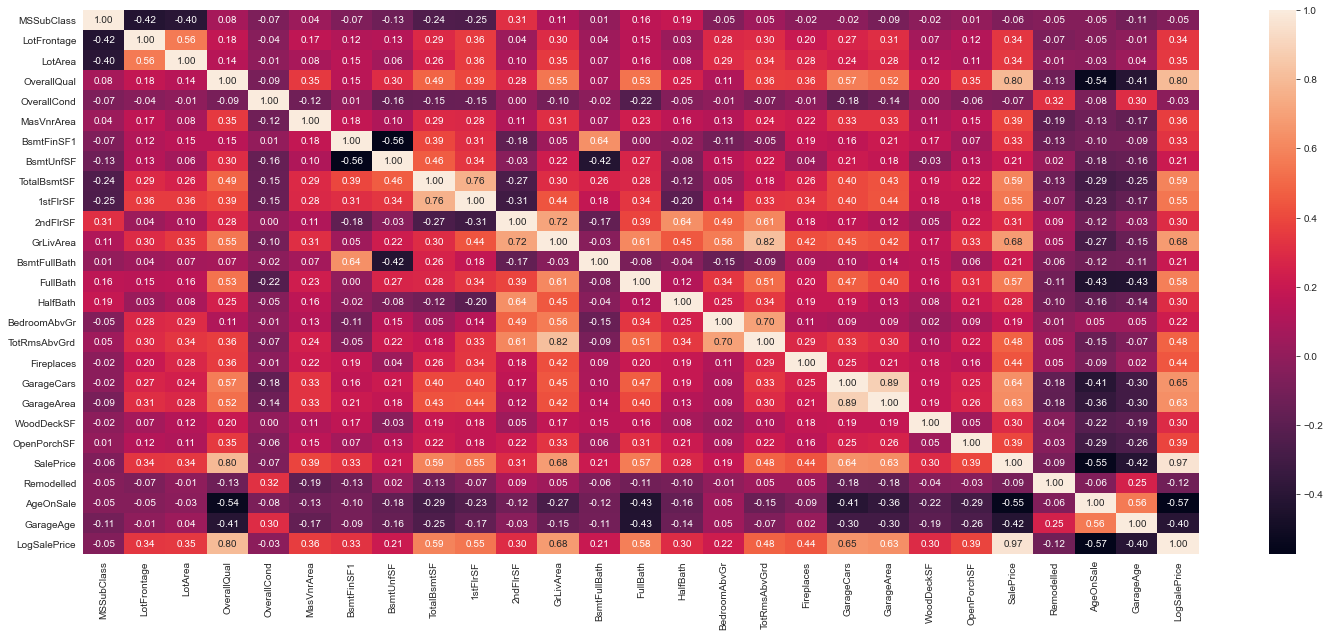

In [40]:
plt.figure(figsize=(25,10))
sns.heatmap(house.corr(), annot=True, fmt='.2f');

From the above heatmap we can see that,
- The target variable, `SalePrice` is highly correlated with `OverallQual`(80%), `GrLivArea`(68%) and `GarageCars`(64%).
- `GrLivArea` is highly correlated with `TotRmsAbvGrd` at 82%. 
- `GarageCars` and `GarageArea` are highly correlated at 89%.

In [41]:
# We'll drop 'TotRmsAbvGrd' and 'GarageArea' as it might cause multicollinearity
house.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

## Data Preparation
### Assigning values to ordinal categorical variables

In [42]:
# Assigning values to ordinal categorical variables
house['n_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['n_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['n_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['n_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
house['n_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['n_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
house['n_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['n_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['n_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
house['n_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['n_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                       'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [43]:
# Dropping the variables for which we have assigned numerical values
house.drop(ord_cols, axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1315 non-null   int64  
 1   MSZoning         1315 non-null   object 
 2   LotFrontage      1315 non-null   float64
 3   LotArea          1315 non-null   int64  
 4   Neighborhood     1315 non-null   object 
 5   OverallQual      1315 non-null   int64  
 6   OverallCond      1315 non-null   int64  
 7   RoofStyle        1315 non-null   object 
 8   Exterior1st      1315 non-null   object 
 9   Exterior2nd      1315 non-null   object 
 10  MasVnrArea       1315 non-null   float64
 11  Foundation       1315 non-null   object 
 12  BsmtFinSF1       1315 non-null   int64  
 13  BsmtUnfSF        1315 non-null   int64  
 14  TotalBsmtSF      1315 non-null   int64  
 15  1stFlrSF         1315 non-null   int64  
 16  2ndFlrSF         1315 non-null   int64  
 17  GrLivArea     

### Creating Dummies

In [44]:
# Creating dummies of the remaining categorical columns
cols = list(house.select_dtypes('object').columns)
house = pd.get_dummies(house, drop_first=True, columns=cols)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,AgeOnSale,GarageAge,LogSalePrice,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_FireplaceQu,n_GarageFinish,n_BldgType,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,208500,0,5,5.0,12.247694,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,181500,0,31,31.0,12.109011,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,223500,1,6,7.0,12.317167,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,140000,1,36,8.0,11.849398,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,250000,0,8,8.0,12.429216,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [45]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(4), int64(36), uint8(72)
memory usage: 553.7 KB


### Train-Test Split

In [46]:
# Dividing the dataset into X and y
X = house.drop(['LogSalePrice','SalePrice'], axis=1)
y = house['LogSalePrice']
print(f'Shape of X: {X.shape} \t Shape of y: {y.shape}')

Shape of X: (1315, 110) 	 Shape of y: (1315,)


In [47]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(f'Shape of X_train: {X_train.shape} \t Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape} \t Shape of y_test: {y_test.shape}')

Shape of X_train: (920, 110) 	 Shape of y_train: (920,)
Shape of X_test: (395, 110) 	 Shape of y_test: (395,)


### Feature Scaling

In [48]:
# Initialising the standard scaler
scaler = StandardScaler()

# Subsetting the columns which needs to be scaled
cols = list(X_train.select_dtypes(exclude='uint8').columns)

# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Ridge Regression

In [49]:
# Instantiating the Ridge regressor
ridge = Ridge()

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Performing Grid Search
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
# Storing the results of Grid Search in a dataframe
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].\
                    sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4,-0.069862,-0.080636,1
14,3,-0.069471,-0.080648,2
16,5,-0.070211,-0.080700,3
13,2,-0.068995,-0.080758,4
17,6,-0.070532,-0.080784,5
18,7,-0.070824,-0.080874,6
19,8,-0.071094,-0.080961,7
12,1,-0.068368,-0.081048,8
20,9,-0.071351,-0.081061,9
11,0.9,-0.068288,-0.081108,10


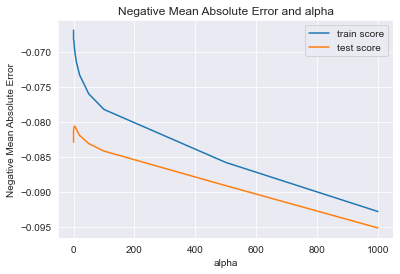

In [51]:
# Plotting the results of Grid Search 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [52]:
# Finding the optimal value of alpha
ridge_model_cv.best_estimator_

Ridge(alpha=4.0)

In [53]:
# Building the model using optimal value of alpha
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01447078,  0.00556911,  0.02145646,  0.06886892,  0.04739652,
       -0.00417242,  0.01071285, -0.01366925,  0.06101482,  0.04394188,
        0.04957793,  0.03163693,  0.0068439 ,  0.01875332,  0.021839  ,
        0.0059942 ,  0.00573102,  0.02372516,  0.01302529,  0.00376429,
       -0.01766761, -0.02587874, -0.02911064,  0.00166107,  0.00413645,
        0.00035737,  0.00474511,  0.01333885,  0.00814399,  0.0107868 ,
        0.01603936,  0.01847949, -0.01307676,  0.011204  ,  0.0007663 ,
        0.00197603,  0.00705046,  0.01361403,  0.05178276,  0.03562976,
        0.03847889,  0.01408476, -0.00364431, -0.01256256,  0.02476575,
        0.00832445, -0.00238495,  0.08703086, -0.05510191, -0.03825761,
       -0.03902368, -0.0563338 , -0.03254206, -0.01035063,  0.03891073,
       -0.04389574,  0.01625242,  0.08555146, -0.04951165, -0.02585049,
       -0.02385314, -0.00909713,  0.04177347,  0.11842323,  0.02040236,
        0.00855667,  0.03576171,  0.05464236,  0.03977214,  0.02

In [54]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, ridge.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, ridge.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0175
R-squared value on test dataset: 0.8688


In [55]:
# Finding the top 10 significant variables according to ridge regressor
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
ridge_df.head(10)

,Features,Coefficient
0,Neighborhood_StoneBr,0.1184
1,Neighborhood_Crawfor,0.0870
2,Neighborhood_NridgHt,0.0856
3,Exterior1st_BrkFace,0.0802
4,OverallQual,0.0689
5,TotalBsmtSF,0.0610
6,RoofStyle_Gambrel,0.0546
7,MSZoning_FV,0.0518
8,Exterior2nd_MetalSd,0.0513
9,2ndFlrSF,0.0496


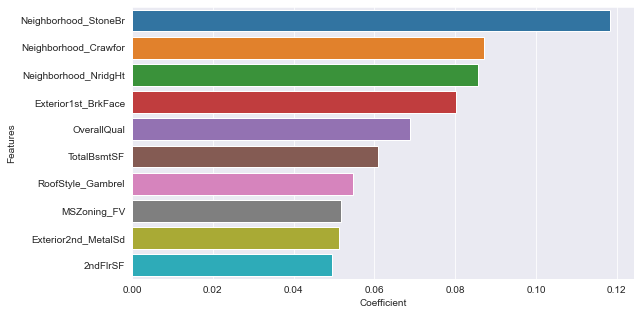

In [56]:
# Plotting the top 10 variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = ridge_df.head(10))
plt.show()

#### Ridge Regression after doubling the alpha value

In [57]:
ridge = Ridge(alpha=8.0)
ridge.fit(X_train, y_train)

print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, ridge.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, ridge.predict(X_test)),4)}')

ridge_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df_2 = ridge_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
ridge_df_2.head(10)

Mean squared error on test dataset: 0.0174
R-squared value on test dataset: 0.8701


,Features,Coefficient
0,Neighborhood_StoneBr,0.0914
1,Neighborhood_Crawfor,0.0774
2,Neighborhood_NridgHt,0.0710
3,OverallQual,0.0710
4,Exterior1st_BrkFace,0.0644
5,TotalBsmtSF,0.0577
6,OverallCond,0.0472
7,2ndFlrSF,0.0435
8,1stFlrSF,0.0398
9,Foundation_PConc,0.0394


## Lasso Regression

In [58]:
# Instantiating the Lasso regressor
lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3,
                   0.4, 0.5]}

# Preforming Grid Search
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True, 
                              verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Storing the results of Grid Search in a dataframe
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].\
                sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.070542,-0.080368,1
1,0.0002,-0.069598,-0.080512,2
3,0.0004,-0.071258,-0.080561,3
4,0.0005,-0.071935,-0.080882,4
0,0.0001,-0.068203,-0.081141,5
5,0.001,-0.074486,-0.082193,6
6,0.002,-0.078538,-0.084608,7
7,0.003,-0.080024,-0.085260,8
8,0.004,-0.080812,-0.085627,9
9,0.005,-0.081385,-0.085964,10


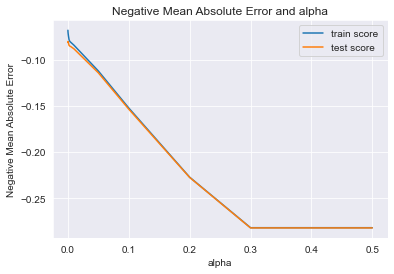

In [60]:
# Plotting the results of Grid Search 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
# Finding the optimal alpha value for lasso regressor
lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [62]:
# Building the model using optimal alpha value
alpha = 0.0003
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.35800039e-02,  6.01405821e-03,  1.97128981e-02,  7.14587399e-02,
        4.70520800e-02, -2.31948152e-03,  1.15012852e-02, -1.28379007e-02,
        5.97886361e-02,  5.40946611e-02,  6.25011469e-02,  1.83844460e-02,
        6.06355760e-03,  1.78065228e-02,  2.04453503e-02,  5.75875639e-03,
        6.53340419e-03,  2.49537501e-02,  1.24332734e-02,  3.56163457e-03,
       -1.80992652e-02, -2.63878413e-02, -2.92490882e-02,  6.14755780e-04,
        5.81834431e-03, -0.00000000e+00,  4.65567332e-03,  1.31105919e-02,
        8.05146642e-03,  1.05472117e-02,  1.46344518e-02,  1.83387811e-02,
       -1.43909177e-02,  1.06002377e-02,  9.26059718e-05,  9.83093630e-04,
        5.61362245e-03,  1.32622160e-02,  3.69845605e-02,  0.00000000e+00,
        2.05366855e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.57679795e-02,  0.00000000e+00,  1.84008393e-04,  9.90714061e-02,
       -4.04864506e-02, -2.80690688e-02, -2.71944858e-02, -2.73900459e-02,
       -1.89871445e-02, -

In [63]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0175
R-squared value on test dataset: 0.8693


In [64]:
# Finding the top 10 significant variables according to lasso regressor
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
lasso_df.head(20)

,Features,Coefficient
0,Neighborhood_StoneBr,0.1377
1,Neighborhood_Crawfor,0.0991
2,Neighborhood_NridgHt,0.0916
3,Exterior1st_BrkFace,0.0768
4,OverallQual,0.0715
5,2ndFlrSF,0.0625
6,TotalBsmtSF,0.0598
7,1stFlrSF,0.0541
8,OverallCond,0.0471
9,Neighborhood_Somerst,0.0439


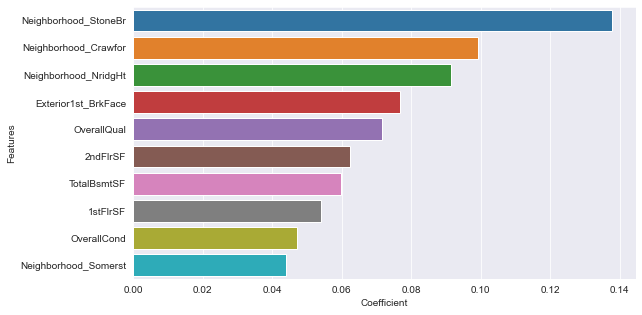

In [65]:
# Plotting top 10 significant variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df.head(10))
plt.show()

#### Lasso Regression after doubling the alpha

In [66]:
lasso = Lasso(alpha=0.0006)
lasso.fit(X_train, y_train)

print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

lasso_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df_2 = lasso_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
lasso_df_2.head(10)

Mean squared error on test dataset: 0.0171
R-squared value on test dataset: 0.8719


,Features,Coefficient
0,Neighborhood_StoneBr,0.1043
1,Neighborhood_Crawfor,0.0881
2,OverallQual,0.0753
3,Neighborhood_NridgHt,0.0734
4,Exterior1st_BrkFace,0.0675
5,TotalBsmtSF,0.0549
6,OverallCond,0.0471
7,2ndFlrSF,0.0415
8,GrLivArea,0.0403
9,1stFlrSF,0.0387


## Conclusion

- The optimal value of lambda, mean squared error and R squared value of Ridge and Lasso Regression are as follows:
    - **Ridge Regression** : 
        - Optimal Lambda : 4.0
        - Mean squared error : 0.0175
        - R-squared value : 0.8688
    - **Lasso Regression** :
        - Optimal Lambda : 0.0003
        - Mean squared error : 0.0175
        - R-squared value : 0.8693
- From the above metrics, we can see that the Lasso Regression performs slightly better than the Ridge Regression. Moreover, Lasso helps in feature reduction by reducing the coefficients of redundant variables to 0.
- The top variables which help in determining the `SalePrice` of a house are as follows:
    - `Neighbourhood` - Physical location of the property in Stone Brook, Crawford, Northridge Heights and Somerset
    - `Exterior1st` - Exterior cover of the house is Brick Face
    - `OverallQual` - Rating of the overall material and finish of the house
    - `2ndFlrSF` - Area covered by 2nd floor of the property
    - `TotalBsmtSF` - Total area of the basement
    - `1stFlrSF` - Area covered by 1st floor of the property
    - `OverallCond` - Rating of the overall condition of the house.